# Explore here

In [39]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [40]:
# load the .env file variables
load_dotenv()

client_id = os.getenv('CLIENT_ID')
client_secret = os.getenv('CLIENT_SECRET')

auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(auth_manager=auth_manager)

artist_id = '6vjF8XdNoqVRj5G021FBM6'

artist_uri = 'spotify:artist:6vjF8XdNoqVRj5G021FBM6'

artist = sp.artist(artist_uri)
artist['name']

'Julian Bream'

In [41]:
results = sp.artist_top_tracks(artist_uri)

tracks = results['tracks']

for track in tracks:
    print(track['name'])

Lágrima
Rodrigo: Concierto de Aranjuez: II. Adagio (Excerpt)
Fantasía para un Gentilhombre: IIa. Españoleta
Lute Music - England: Melancholy Galliard
Divertimento in B-Flat Major, K. Anh. 229 No. 2: III. Larghetto (Arr. J. Bream for Guitar)
Gloriana: Courtly Dances: Galliard
Concierto de Aranjuez: II. Adagio [Excerpt]
Concierto de Aranjuez: II. Adagio
Fantasía para un Gentilhombre: IV. Canario
Prelude in D Minor, BWV 999


In [55]:
data = pd.DataFrame(tracks)

data.head()

,album,artists,available_markets,disc_number,duration_ms,explicit,external_ids,external_urls,href,id,is_local,is_playable,name,popularity,preview_url,track_number,type,uri
0,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,123426,False,{'isrc': 'USBC17000114'},{'spotify': 'https://open.spotify.com/track/1a...,https://api.spotify.com/v1/tracks/1aMeBqrCnPf1...,1aMeBqrCnPf1CzRXlKyNFs,False,True,Lágrima,41,None,7,track,spotify:track:1aMeBqrCnPf1CzRXlKyNFs
1,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,285186,False,{'isrc': 'GBAYC9001093'},{'spotify': 'https://open.spotify.com/track/79...,https://api.spotify.com/v1/tracks/79s98PAHLFbW...,79s98PAHLFbWQrTMDtTTwm,False,True,Rodrigo: Concierto de Aranjuez: II. Adagio (Ex...,27,None,24,track,spotify:track:79s98PAHLFbWQrTMDtTTwm
2,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,304466,False,{'isrc': 'USBC10400687'},{'spotify': 'https://open.spotify.com/track/1Y...,https://api.spotify.com/v1/tracks/1YNCqpQZR3PF...,1YNCqpQZR3PFwlyQ7cbwxZ,False,True,Fantasía para un Gentilhombre: IIa. Españoleta,36,None,11,track,spotify:track:1YNCqpQZR3PFwlyQ7cbwxZ
3,"{'album_type': 'compilation', 'artists': [{'ex...",[{'external_urls': {'spotify': 'https://open.s...,"[AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, BR, C...",1,230000,False,{'isrc': 'DEF055634109'},{'spotify': 'https://open.spotify.com/track/4R...,https://api.spotify.com/v1/tracks/4RMIruKbqMd8...,4RMIruKbqMd8xj2AMvMLxZ,False,True,Lute Music - England: Melancholy Galliard,29,None,22,track,spotify:track:4RMIruKbqMd8xj2AMvMLxZ
4,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,282666,False,{'isrc': 'USBC16800147'},{'spotify': 'https://open.spotify.com/track/7M...,https://api.spotify.com/v1/tracks/7M9W0K3R2AnK...,7M9W0K3R2AnKRk0bC1x62f,False,True,"Divertimento in B-Flat Major, K. Anh. 229 No. ...",10,None,9,track,spotify:track:7M9W0K3R2AnKRk0bC1x62f


In [59]:
data = data.sort_values(by='popularity')

data.name.head(3)

5                   Gloriana: Courtly Dances: Galliard
4    Divertimento in B-Flat Major, K. Anh. 229 No. ...
8           Fantasía para un Gentilhombre: IV. Canario
Name: name, dtype: object

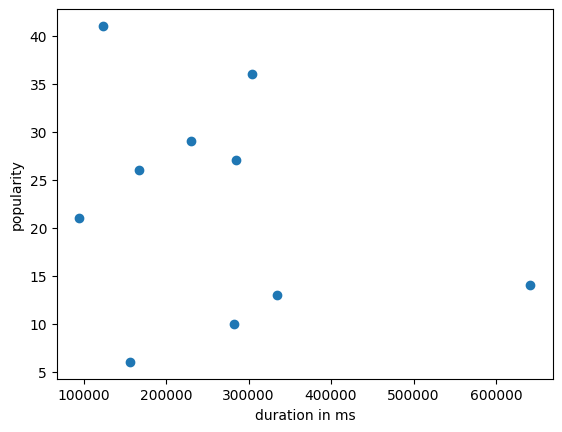

In [49]:
plt.scatter(data.duration_ms, data.popularity)

plt.xlabel('duration in ms')

plt.ylabel('popularity')

plt.show()

No apparent correlation between popularity and duration